In [1]:
%load_ext autoreload
%autoreload 2 
%matplotlib ipympl
from pianoq.lab.lee_holo.generate_lee import main, make_oam_donut, orthogonal_lee
import matplotlib.pyplot as plt 
from pianoq.lab.dmd import DMD
from pianoq.lab.VimbaCamera import VimbaCamera

"""
G:/My Drive/Equipment (Specs, Drivers, Manuals)/Ajile DMD/dlp4500.pdf
dx_DMD = 7.637e-6
dx_cam = 4.8e-6
laser wl = 633e-9
f1=100e-3 #mm 
f2=40e-3 #mm 
"""

'\nG:/My Drive/Equipment (Specs, Drivers, Manuals)/Ajile DMD/dlp4500.pdf\ndx_DMD = 7.637e-6\ndx_cam = 4.8e-6\nlaser wl = 633e-9\nf1=100e-3 #mm \nf2=40e-3 #mm \n'

In [2]:
dmd = DMD()

Connected!
Built project!


In [31]:
dmd.close()

In [3]:
cam = VimbaCamera(1)

INFO:vmbpyLog:Starting vmbpy: 1.0.4 (using VmbC: 1.0.5, VmbImageTransform: 2.0)


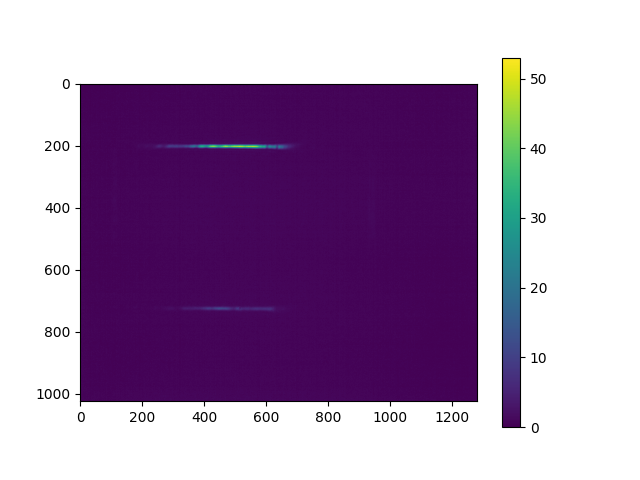

(<Figure size 640x480 with 2 Axes>, <Axes: >)

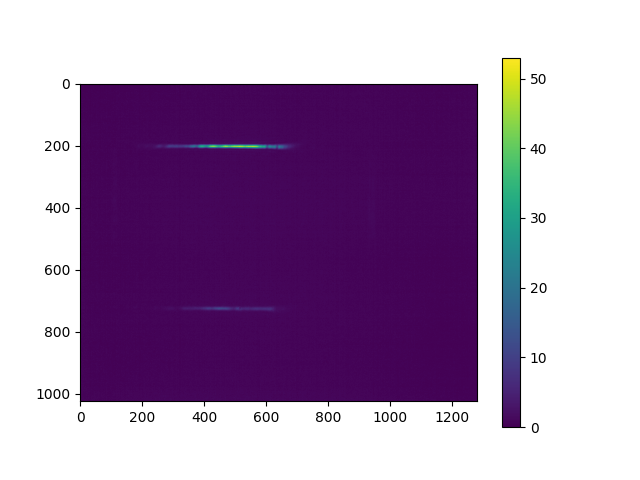

In [4]:
cam.show_image()

In [7]:
dmd.set_grating(50)

In [19]:
dmd.close()

In [18]:
cam.close()

In [14]:
cam.close()

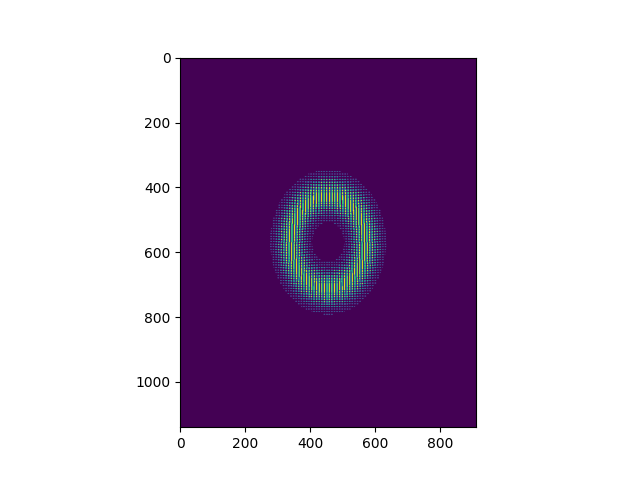

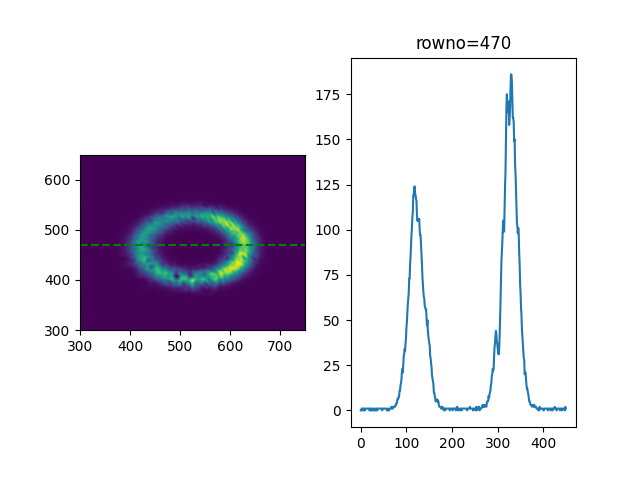

In [17]:
# calc Lee hologram 
GRATING_PERIOD_PX = 8            # p (pixels)  ⇒ ν = 1/p cycles/pixel
CARRIER_F         = (1/GRATING_PERIOD_PX, 0)  # along +x by default

target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=2, r0=0.25)
# target = make_oam_donut(Nx=dmd.Nx, Ny=dmd.Ny, ell=0, r0=0.0, sigma=0.2)
hologram, _ = orthogonal_lee(target, carrier_f=CARRIER_F, duty_cycle=0.5)

if True:
    fig, ax = plt.subplots()
    ax.imshow(hologram)

cam.set_exposure_time(5000)
dmd.set_image(~hologram.astype(bool))
im = cam.get_image()

if True:
    fig, ax = plt.subplots(1, 2)
    rowno = 470
    ax[0].imshow(im)
    ax[0].axhline(rowno, ls='--', color='green')
    ax[0].set_xlim(300, 750)
    ax[0].set_ylim(300, 650)
    ax[1].plot(im[rowno, 300:750])
    ax[1].set_title(f'{rowno=}')


---- Fourier-plane (zeroth-order trick) ----
Pixel pitch p                : 4.80 µm
Wavelength λ                 : 633 nm
Fourier lens f               : 100 mm
|carrier|  f_c               : 0.0833 cycles/pixel
aperture  f_r                : 0.0400 cycles/pixel
Nearest contaminant radius   : r_sep ≈ 1.099 mm (shifted DC)
Pinhole radius at DC         : r_pin ≈ 0.528 mm  ⇒  diameter ≈ 1.055 mm
Centricity slack (geom.)     : ≤ 0.571 mm before overlap
Note: aperture fairly large; consider APERTURE_RADIUS ≤ 0.3–0.4·|carrier| for margin.
----------------------------------------------------------------



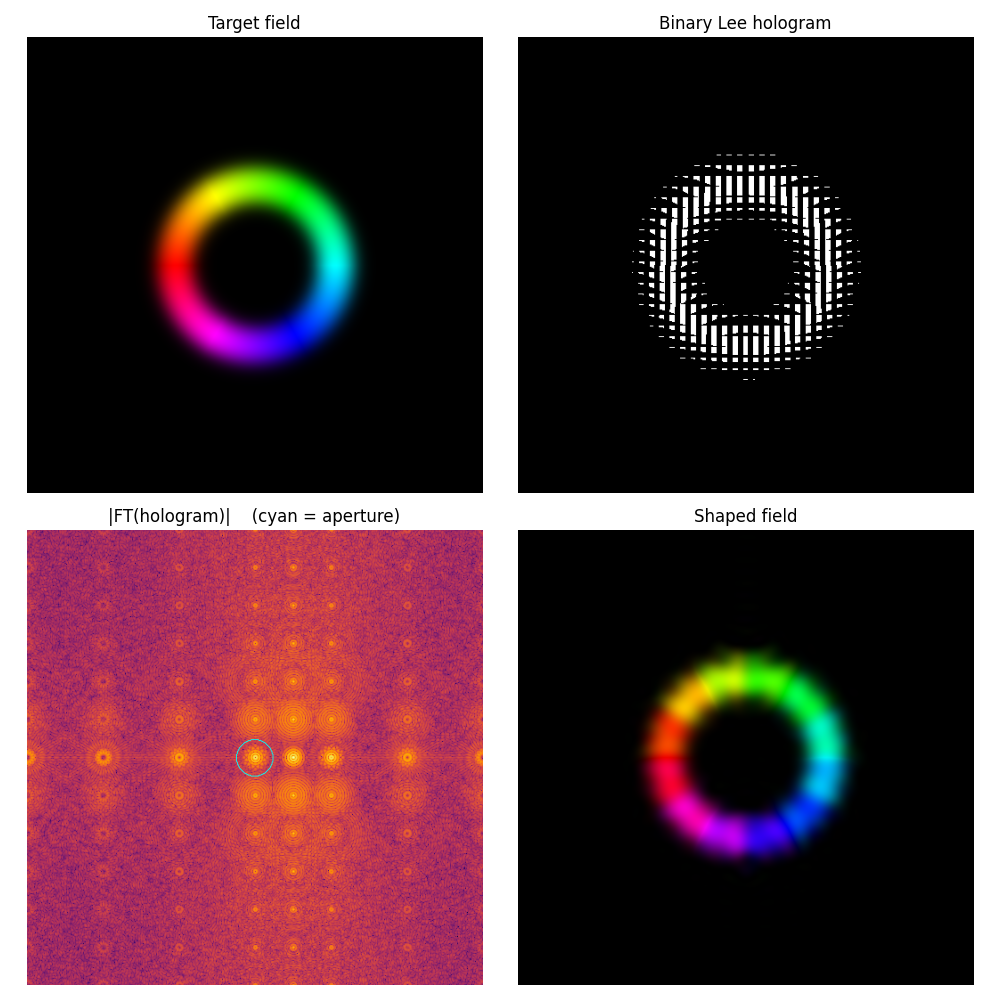

Complex correlation |⟨target|shaped⟩| = 0.991


In [89]:
main(12)